# Exploring the Results of Machine Learning #

In this notebook I explore some of the implications of the machine learning results.

In [1]:
# import necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import pydotplus

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn import ensemble

from IPython.display import SVG

The decision tree was so effective, I thought it would be interesting to see if a single decision tree done on a subset of the data would still be interesting, perhaps for decision making for road designers.

I created a data set where the only features were:
- traffic_density: Average Annual Daily Traffic, measured by counting the total number of vehicles in a year and dividing by 365
- bike_acc_score: the number of bike accidents that happened in that area within 50m of each other
- ROW_Width: right of way width: includes road surface and property ceded by property owners
- Struct_Cnd: Structural condition
- Surface_Wd: Surface width
- Surface_Tp: Surface Type
- Rt_Sidewlk: right sidewalk width
- Lt_Sidewlk: left sidewalk width
- Terrain: terrain
- Med_Width: median width
- Op_Dir_SL: opposite direction speed limit

And then created a decision tree from those features.

In [2]:
#build smaller feature set
#read in data set before making dummies
sel_df = pd.read_csv('data/cleaned_data/model_df.csv')
sel_df = sel_df[['car_acc_score', 'traffic_density', 'bike_acc_score', 'ROW_Width', 'Surface_Wd', 'Surface_Tp', 
                'Rt_Sidewlk', 'Lt_Sidewlk', 'Struct_Cnd', 'Terrain',
                'Med_Width', 'Op_Dir_SL']]
sel_dum = pd.get_dummies(sel_df, columns=['Struct_Cnd', 'Terrain', 'Surface_Tp'])
sel_dum.head()

,car_acc_score,traffic_density,bike_acc_score,ROW_Width,Surface_Wd,Rt_Sidewlk,Lt_Sidewlk,Med_Width,Op_Dir_SL,Struct_Cnd_-1,...,Surface_Tp_1,Surface_Tp_2,Surface_Tp_3,Surface_Tp_4,Surface_Tp_5,Surface_Tp_6,Surface_Tp_7,Surface_Tp_8,Surface_Tp_9,Surface_Tp_10
0,1,1.707255,10,50.0,28.0,4.0,4.0,0.0,30,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0.186701,4,50.0,28.0,4.0,4.0,0.0,30,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0.345786,1,50.0,28.0,4.0,4.0,0.0,30,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0.470252,10,55.0,30.0,5.0,5.0,0.0,99,0,...,0,0,0,0,0,0,1,0,0,0
4,0,2.013781,1,55.0,30.0,5.0,5.0,0.0,99,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
car_y = sel_dum.car_acc_score
car_X = sel_dum.drop(columns=['car_acc_score'])
car_c_y = sel_dum.car_acc_score.mask(sel_dum.car_acc_score > 0, 1)

# do train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)

In [4]:
dtc = tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(X_car_c_train, y_car_c_train)
dtc.score(X_car_c_test, y_car_c_test)

0.8681926518864955

Even with only the features listed above, and limiting the depth to 5, a single decsion tree can still predict accidents with 87% accuracy. So the decision tree would be useful for road design decision-makers to help them predict accidents.

In [5]:
fn = X_car_c_train.columns
cn = ['Accident', 'No Accident']
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
#tree.plot_tree(dtc, feature_names=fn, class_names=cn, filled=True, impurity=False, fontsize=3)
#fig.savefig('car_tree.png')
#plt.show()
dot_data = tree.export_graphviz(dtc, feature_names=fn, class_names=cn, out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()
graph.write_png('car_decision_tree.png')

True

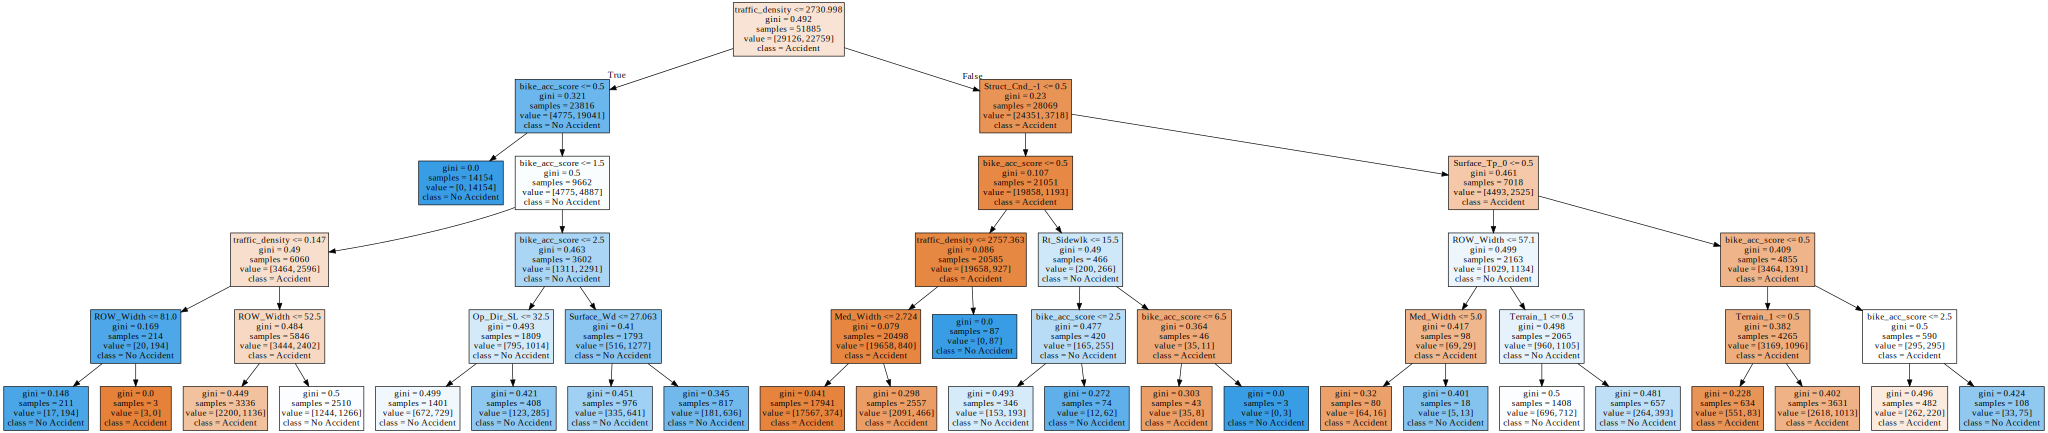

In [6]:
graph = graphviz.Source(dot_data)
graph

Similarly for bike accidents, let's see if we can create a small(ish), meaningful decision tree.

In [7]:
#build smaller feature set
#read in data set before making dummies
bike_df = pd.read_csv('data/cleaned_data/model_df.csv')
bike_df = bike_df[['car_acc_score', 'bike_acc_score', 'AADT', 'ROW_Width', 'Surface_Wd', 
                'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width',
                 'Op_Dir_SL', 'Struct_Cnd', 'Operation', 'Terrain', 'F_Class']]
bike_dum = pd.get_dummies(bike_df, columns=['Struct_Cnd',
                                         'Operation', 'Terrain', 'F_Class'])
bike_dum.head()

,car_acc_score,bike_acc_score,AADT,ROW_Width,Surface_Wd,Rt_Sidewlk,Lt_Sidewlk,Med_Width,Op_Dir_SL,Struct_Cnd_-1,...,Terrain_1,Terrain_2,Terrain_3,F_Class_-1,F_Class_0,F_Class_1,F_Class_2,F_Class_3,F_Class_5,F_Class_6
0,1,10,1154.0,50.0,28.0,4.0,4.0,0.0,30,0,...,1,0,0,0,1,0,0,0,0,0
1,0,4,1154.0,50.0,28.0,4.0,4.0,0.0,30,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,1154.0,50.0,28.0,4.0,4.0,0.0,30,0,...,1,0,0,0,1,0,0,0,0,0
3,1,10,3598.0,55.0,30.0,5.0,5.0,0.0,99,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,3598.0,55.0,30.0,5.0,5.0,0.0,99,0,...,1,0,0,0,0,0,0,0,0,1


In [8]:

bike_X = bike_dum.drop(columns=['bike_acc_score'])
bike_c_y = bike_dum.bike_acc_score.mask(bike_dum.bike_acc_score > 0, 1)

# do train test split
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

In [13]:
dtc = tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(X_bike_c_train, y_bike_c_train)
dtc.score(X_bike_c_test, y_bike_c_test)

0.7921931915276341

[[17080   446]
 [ 4175   536]]


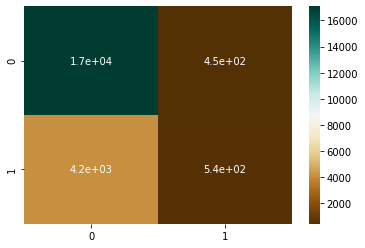

In [14]:
pred = dtc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)

In [15]:
fn = X_bike_c_train.columns
cn = ['Accident', 'No Accident']
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
#tree.plot_tree(dtc, feature_names=fn, class_names=cn, filled=True, impurity=False, fontsize=3)
#fig.savefig('car_tree.png')
#plt.show()
dot_data = tree.export_graphviz(dtc, feature_names=fn, class_names=cn, out_file=None, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()
graph.write_png('bike_decision_tree.png')

True

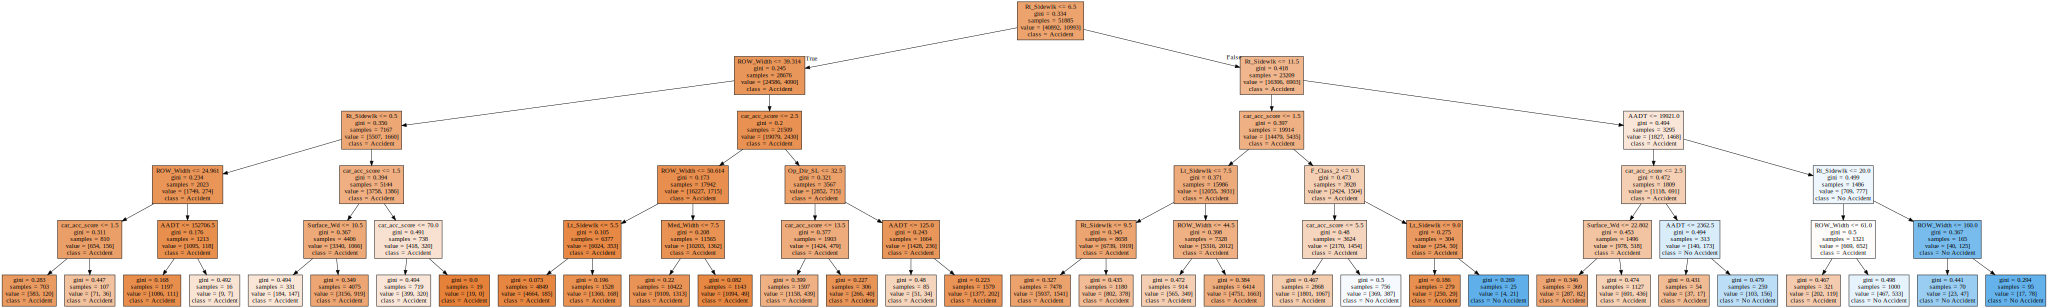

In [16]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
bc = ensemble.BaggingClassifier(random_state=18)
params = {'n_estimators': [10, 100, 500, 1000],
         'max_features' : [0.25, 0.5, 0.75]}
cv = GridSearchCV(bc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))
#bc.fit(X_car_c_train, y_car_c_train)
#score = bc.score(X_car_c_test, y_car_c_test)
#print('Bagging Classifier accuracy score is {}'.format(score))

In [ ]:
bc = ensemble.BaggingClassifier(random_state=18, n_estimators=100)
params = {'max_features' : [0.65, 0.75, 0.8, 0.9, 1.0]}
cv = GridSearchCV(bc, params)
cv.fit(X_car_c_train, y_car_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_car_c_test, y_car_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

In [ ]:
bc = ensemble.BaggingClassifier(random_state=18, n_estimators=100, max_features=0.75)
bc.fit(X_car_c_train, y_car_c_train)

In [ ]:
pred = bc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [ ]:
print(classification_report(y_car_c_test, pred))

In [ ]:
# create dataframe of false positives
# create dataframe of true positives
# compare on top 10 features
car_false_pos = X_car_c_test[pred > y_car_c_test]
car_true_pos = X_car_c_test[(pred == y_car_c_test) & (y_car_c_test == 1)]

car_false_pos.describe()

In [ ]:
car_true_pos.describe()

In [ ]:
car_false_means = car_false_pos[['traffic_density', 'bike_acc_score', 'AADT',
                            'ROW_Width', 'Surface_Wd', 'Surface_Tp',
                            'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 'Op_Dir_SL']].describe().loc['mean']
car_true_means = car_true_pos[['traffic_density', 'bike_acc_score', 'AADT',
                            'ROW_Width', 'Surface_Wd', 'Surface_Tp',
                            'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 'Op_Dir_SL']].describe().loc['mean']
car_false_summary = pd.DataFrame({"means": car_false_means})
car_false_summary['true_false'] = 0
#, "true_means": car_true_means})

In [ ]:
car_true_summary = pd.DataFrame({"means": car_true_means})
car_true_summary['true_false'] = 1
car_summary = car_false_summary.append(car_true_summary)
car_summary = car_summary.reset_index()
car_summary = car_summary.rename(columns={'index' : 'feature'})

In [ ]:
traffic = car_summary[(car_summary.feature == 'traffic_density') | (car_summary.feature == 'AADT')]
sns.barplot(x="feature", y="means", hue="true_false", data=traffic)

In [ ]:
bike_acc = car_summary[car_summary.feature == 'bike_acc_score']
sns.barplot(x="feature", y="means", hue="true_false", data=bike_acc)

In [ ]:
other_features = car_summary[(car_summary.feature != 'bike_acc_score') & 
                             (car_summary.feature != 'AADT') &
                            (car_summary.feature != 'traffic_density')]
plt.figure(figsize=(20,10))
sns.barplot(x="feature", y="means", hue="true_false", data=other_features)

In [ ]:
car_true_neg = X_car_c_test[(pred == y_car_c_test) & (y_car_c_test == 0)]
car_true_neg_means = car_true_neg[['traffic_density', 'bike_acc_score', 'AADT',
                            'ROW_Width', 'Surface_Wd', 'Surface_Tp',
                            'Rt_Sidewlk', 'Lt_Sidewlk', 'Med_Width', 'Op_Dir_SL']].describe().loc['mean']

In [ ]:
car_neg_summary = pd.DataFrame({"means": car_true_neg_means})
car_neg_summary['true_false'] = 0

car_summary_2 = car_true_summary.append(car_neg_summary)
car_summary_2 = car_summary_2.reset_index()
car_summary_2 = car_summary_2.rename(columns={'index' : 'feature'})

In [ ]:
traffic = car_summary_2[(car_summary_2.feature == 'traffic_density') | (car_summary_2.feature == 'AADT')]
sns.barplot(x="feature", y="means", hue="true_false", data=traffic)

In [ ]:
bike_acc = car_summary_2[car_summary_2.feature == 'bike_acc_score']
sns.barplot(x="feature", y="means", hue="true_false", data=bike_acc)

In [ ]:
other_features = car_summary_2[(car_summary_2.feature != 'bike_acc_score') & 
                             (car_summary_2.feature != 'AADT') &
                            (car_summary_2.feature != 'traffic_density')]
plt.figure(figsize=(20,10))
sns.barplot(x="feature", y="means", hue="true_false", data=other_features)

In [ ]:
ten_pct = sel_dum.copy()
ten_pct['traffic_density'] = ten_pct['traffic_density']*1.1
ten_pct.head()

In [ ]:
ten_pct_X = ten_pct.drop(columns=['car_acc_score'])
ten_pct_pred = bc.predict(ten_pct_X)
print('With current traffic, {} accidents. With 10% more traffic, predict {} accidents'.format(sum(car_c_y), sum(ten_pct_pred)))

In [ ]:
current_acc = sum(car_c_y)

percents = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]
for p in percents:
    df = sel_dum.copy()
    df['traffic_density'] = df['traffic_density'] * (1 + p)
    X = df.drop(columns=['car_acc_score'])
    pred = bc.predict(X)
    if (p >= 0.01):
        pct = round(p*100)
    else:
        pct = p*100
    pct_more = round(((sum(pred) - current_acc)/current_acc)*100)
    print("{}% more traffic could lead to {}% more accidents, or {} additional accidents.".format(pct, pct_more, sum(pred) - current_acc))

In [ ]:
#build smaller feature set
#read in data set before making dummies
bike_df = pd.read_csv('data/cleaned_data/model_df.csv')
bike_df = bike_df[['car_acc_score', 'bike_acc_score', 'AADT', 'City', 'ROW_Width', 'Surface_Wd', 
                 'Jurisdictn', 'Rt_Sidewlk', 'Lt_Sidewlk', 'Route_Direction', 'Med_Width',
                 'Op_Dir_SL', 'Struct_Cnd', 'Operation', 'Terrain', 'F_Class']]
bike_dum = pd.get_dummies(bike_df, columns=['City', 'Jurisdictn', 'Route_Direction', 'Struct_Cnd',
                                         'Operation', 'Terrain', 'F_Class'])
bike_dum.head()

In [ ]:
bike_X = bike_dum.drop(columns=['bike_acc_score'])
bike_c_y = bike_dum.bike_acc_score.mask(bike_dum.car_acc_score > 0, 1)

# do train test split
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

In [ ]:
gbc = ensemble.GradientBoostingClassifier(random_state=18)
params = {'n_estimators': [10, 100, 500, 1000],
          'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
          'max_depth' : [2, 3, 5, 10],
          'max_features': ['sqrt', 'log2', None],
          'min_samples_split': [2, 5, 10, 20]}
cv = RandomizedSearchCV(gbc, params)
cv.fit(X_bike_c_train, y_bike_c_train)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_bike_c_test, y_bike_c_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

To Do List:
- [ ] Confusion matrix and classification report for best model
- [ ] Try altering bike model
- [ ] Look into false positives
- [ ] Visualize decision trees